<a href="https://colab.research.google.com/github/Pepcoders/Data-Science-March/blob/main/Ensemble/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=500, noise = 0.2)

In [ ]:
X

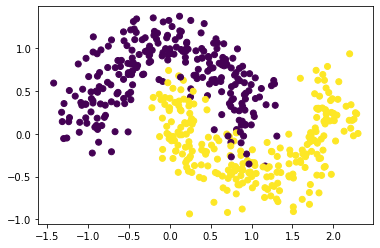

In [5]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

In [12]:
X_train.shape, y_train.shape

((350, 2), (350,))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

log = LogisticRegression()
smv = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [24]:
models = [
          ("Logistic", log),
          ("SMV", smv),
          ("KNN", knn),
          ("Decision Tree", dt)
]

# Hard Voiting

In [26]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier(estimators = models, voting='hard', n_jobs = -1)

vot.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic', LogisticRegression()), ('SMV', SVC()),
                             ('KNN', KNeighborsClassifier()),
                             ('Decision Tree', DecisionTreeClassifier())],
                 n_jobs=-1)

In [27]:
vot.score(X_test, y_test)

0.9666666666666667

In [29]:
for model in models:
  model = model[1]
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)

  print(model.__class__.__name__, score)

LogisticRegression 0.8466666666666667
SVC 0.9666666666666667
KNeighborsClassifier 0.98
DecisionTreeClassifier 0.9466666666666667


# Soft Voting

In [37]:
from sklearn.ensemble import VotingClassifier

log = LogisticRegression()
smv = SVC(probability=True)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

models = [
          ("Logistic", log),
          ("SMV", smv),
          ("KNN", knn),
          ("Decision Tree", dt)
]

vot_soft = VotingClassifier(estimators = models, voting='soft', n_jobs = -1)

vot_soft.fit(X_train, y_train)
vot_soft.score(X_test, y_test)

0.96

# Voting - weight

In [38]:
vot = VotingClassifier(estimators = models, voting='hard', n_jobs = -1, weights=[1, 3, 4, 2])

vot.fit(X_train, y_train)
vot.score(X_test, y_test)

0.96

# Stacking Reg

In [39]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import StackingRegressor

In [40]:
X, y = load_diabetes(return_X_y=True)

In [43]:
X.shape, y.shape

((442, 10), (442,))

In [45]:
base_model = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42)),
    ('knn', KNeighborsRegressor())
]

meta_model = RandomForestRegressor(n_estimators=10, random_state=42)

In [46]:
reg = StackingRegressor(
    estimators=base_model,
    final_estimator= meta_model,
    cv = 5,
    n_jobs = -1
)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

reg.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('lr', RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('svr', LinearSVR(random_state=42)),
                              ('knn', KNeighborsRegressor())],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42),
                  n_jobs=-1)

In [49]:
reg.score(X_test, y_test)

0.4113366255936256

In [50]:
for model in base_model:
  model = model[1]
  model.fit(X_train, y_train)

  score = model.score(X_test, y_test)

  print(model.__class__.__name__, score)

RidgeCV 0.4918283729062708
LinearSVR -0.2664088953466164
KNeighborsRegressor 0.44659346214225026
